Trabalho de Tópicos Especiais em Econometria 

Importação das bibliotecas

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sqlite3


Carregamento de dados através da API do Banco Central do Brasil. 
Foi carregada a Taxa de Inadimplência mensal em % e a média da taxa de juros mensal para operações de crédito no Brasil. 

In [83]:
jurosmedmensal= pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.25433/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
txinadimplencia = pd.read_csv  ('http://api.bcb.gov.br/dados/serie/bcdata.sgs.21082/dados?formato=csv',
                                sep = ';', encoding = 'utf-8', decimal = ',')


Exploração inicial dos dados: 

In [34]:
jurosmedmensal.head()

,data,valor
0,01/03/2011,2.05
1,01/04/2011,2.09
2,01/05/2011,2.08
3,01/06/2011,2.07
4,01/07/2011,2.08


In [11]:
txinadimplencia.head()


,data,valor
0,01/03/2011,3.18
1,01/04/2011,3.25
2,01/05/2011,3.37
3,01/06/2011,3.33
4,01/07/2011,3.42


AttributeError: 'list' object has no attribute 'show'

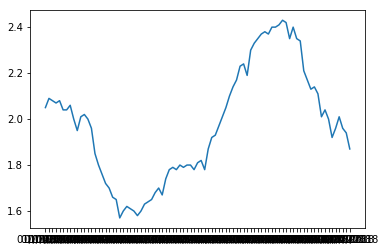

In [33]:
grafjuros = plt.plot(jurosmedmensal.data, jurosmedmensal.valor)
plt.show()

Um pouco de datawrangling para juntar nossos dados em um único dataframe.

In [87]:
txinadimplencia.columns = ['data1', 'txinadimp']
jurosmedmensal.columns = ['data2', 'juros']
dataframe = [txinadimplencia, jurosmedmensal]
dataframe = pd.concat(dataframe, 1)
dataframe = dataframe.drop('data2', 1)
dataframe.head()


,data1,txinadimp,juros
0,01/03/2011,3.18,2.05
1,01/04/2011,3.25,2.09
2,01/05/2011,3.37,2.08
3,01/06/2011,3.33,2.07
4,01/07/2011,3.42,2.08


Com os dados carregados em uma dataframe do pandas, iremos salvar nossos dados em um banco de dados para o uso posterior, através do SQLite3. 

In [98]:
database = sqlite3.connect('dados.db')
c = database.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS variaveis (data text, txjuros real, inadimplencia real)''')

#c.executemany('INSERT into variaveis VALUES (?,?,?)', dataframe)
dataframe.to_sql("variaveis", database, if_exists = 'replace') 


Carregando os dados do banco de dados local:

In [97]:
econvars = pd.read_sql_query("SELECT * FROM variaveis;", database)
econvars.head()

,index,data1,txinadimp,juros
0,0,01/03/2011,3.18,2.05
1,1,01/04/2011,3.25,2.09
2,2,01/05/2011,3.37,2.08
3,3,01/06/2011,3.33,2.07
4,4,01/07/2011,3.42,2.08


In [99]:


#jurosmedmensal['data'] = pd.to_datetime(jurosmedmensal['data'], format = '%d/%m/%Y')


#juros2 = pd.Series(data=jurosmedmensal['valor'], index=jurosmedmensal['data'])


#juros3 = pd.Series(jurosmedmensal.valor)
#juros3.head()

KeyError: 'data'